In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve

In [4]:
df = pd.read_csv('data/one_hot.csv')

In [5]:
df

Disease  \
0                            Fungal infection   
1                            Fungal infection   
2                            Fungal infection   
3                            Fungal infection   
4                            Fungal infection   
...                                       ...   
4915  (vertigo) Paroymsal  Positional Vertigo   
4916                                     Acne   
4917                  Urinary tract infection   
4918                                Psoriasis   
4919                                 Impetigo   

      (Vertigo) Paroymsal  Positional Vertigo  Abdominal Pain  \
0                                           0               0   
1                                           0               0   
2                                           0               0   
3                                           0               0   
4                                           0               0   
...                                       ...             ...   
4915                                        1               0   
4916                                        0               0   
4917                                        0               0   
4918                                        0               0   
4919                                        0               0   

      Abnormal Menstruation  Acidity  Acne  Acute Liver Failure  Aids  \
0                         0        0     0                    0     0   
1                         0        0     0                    0     0   
2                         0        0     0                    0     0   
3                         0        0     0                    0     0   
4                         0        0     0                    0     0   
...                     ...      ...   ...                  ...   ...   
4915                      0        0     0                    0     0   
4916                      0        0     1                    0     0   
4917                      0        0     0                    0     0   
4918                      0        0     0                    0     0   
4919                      0        0     0                    0     0   

      Alcoholic Hepatitis  Allergy  ...  Vomiting  Watering From Eyes  \
0                       0        0  ...         0                   0   
1                       0        0  ...         0                   0   
2                       0        0  ...         0                   0   
3                       0        0  ...         0                   0   
4                       0        0  ...         0                   0   
...                   ...      ...  ...       ...                 ...   
4915                    0        0  ...         1                   0   
4916                    0        0  ...         0                   0   
4917                    0        0  ...         0                   0   
4918                    0        0  ...         0                   0   
4919                    0        0  ...         0                   0   

      Weakness In Limbs  Weakness Of One Body Side  Weight Gain  Weight Loss  \
0                     0                          0            0            0   
1                     0                          0            0            0   
2                     0                          0            0            0   
3                     0                          0            0            0   
4                     0                          0            0            0   
...                 ...                        ...          ...          ...   
4915                  0                          0            0            0   
4916                  0                          0            0            0   
4917                  0                          0            0            0   
4918                  0                          0            0            0   
4919                  0           

Idea: create model that predicts irregularity based on disease and symptoms

How: create training dataset by sampling from original, adding symptoms for irregular examples and subtracting for non-irregular

In [6]:
irregular_symptoms_all = (df.groupby('Disease').sum() == 0)
irregular_symptoms_all.head()

(Vertigo) Paroymsal  Positional Vertigo  \
Disease                                                                            
(vertigo) Paroymsal  Positional Vertigo                                    False   
AIDS                                                                        True   
Acne                                                                        True   
Alcoholic hepatitis                                                         True   
Allergy                                                                     True   

                                         Abdominal Pain  \
Disease                                                   
(vertigo) Paroymsal  Positional Vertigo            True   
AIDS                                               True   
Acne                                               True   
Alcoholic hepatitis                               False   
Allergy                                            True   

                                         Abnormal Menstruation  Acidity  \
Disease                                                                   
(vertigo) Paroymsal  Positional Vertigo                   True     True   
AIDS                                                      True     True   
Acne                                                      True     True   
Alcoholic hepatitis                                       True     True   
Allergy                                                   True     True   

                                          Acne  Acute Liver Failure   Aids  \
Disease                                                                      
(vertigo) Paroymsal  Positional Vertigo   True                 True   True   
AIDS                                      True                 True  False   
Acne                                     False                 True   True   
Alcoholic hepatitis                       True                 True   True   
Allergy                                   True                 True   True   

                                         Alcoholic Hepatitis  Allergy  \
Disease                                                                 
(vertigo) Paroymsal  Positional Vertigo                 True     True   
AIDS                                                    True     True   
Acne                                                    True     True   
Alcoholic hepatitis                                    False     True   
Allergy                                                 True    False   

                                         Altered Sensorium  ...  Vomiting  \
Disease                                                     ...             
(vertigo) Paroymsal  Positional Vertigo               True  ...     False   
AIDS                                                  True  ...      True   
Acne                                                  True  ...      True   
Alcoholic hepatitis                                   True  ...     False   
Allergy                                               True  ...      True   

                                         Watering From Eyes  \
Disease                                                       
(vertigo) Paroymsal  Positional Vertigo                True   
AIDS                                                   True   
Acne                                                   True   
Alcoholic hepatitis                                    True   
Allergy                                               False   

                                         Weakness In Limbs  \
Disease                                                      
(vertigo) Paroymsal  Positional Vertigo               True   
AIDS                                                  True   
Acne                                                  True   
Alcoholic hepatitis                                   True   
Allergy                                               True   

                                    

In [7]:
symptoms = df.iloc[:, 1:]
symptoms

(Vertigo) Paroymsal  Positional Vertigo  Abdominal Pain  \
0                                           0               0   
1                                           0               0   
2                                           0               0   
3                                           0               0   
4                                           0               0   
...                                       ...             ...   
4915                                        1               0   
4916                                        0               0   
4917                                        0               0   
4918                                        0               0   
4919                                        0               0   

      Abnormal Menstruation  Acidity  Acne  Acute Liver Failure  Aids  \
0                         0        0     0                    0     0   
1                         0        0     0                    0     0   
2                         0        0     0                    0     0   
3                         0        0     0                    0     0   
4                         0        0     0                    0     0   
...                     ...      ...   ...                  ...   ...   
4915                      0        0     0                    0     0   
4916                      0        0     1                    0     0   
4917                      0        0     0                    0     0   
4918                      0        0     0                    0     0   
4919                      0        0     0                    0     0   

      Alcoholic Hepatitis  Allergy  Altered Sensorium  ...  Vomiting  \
0                       0        0                  0  ...         0   
1                       0        0                  0  ...         0   
2                       0        0                  0  ...         0   
3                       0        0                  0  ...         0   
4                       0        0                  0  ...         0   
...                   ...      ...                ...  ...       ...   
4915                    0        0                  0  ...         1   
4916                    0        0                  0  ...         0   
4917                    0        0                  0  ...         0   
4918                    0        0                  0  ...         0   
4919                    0        0                  0  ...         0   

      Watering From Eyes  Weakness In Limbs  Weakness Of One Body Side  \
0                      0                  0                          0   
1                      0                  0                          0   
2                      0                  0                          0   
3                      0                  0                          0   
4                      0                  0                          0   
...                  ...                ...                        ...   
4915                   0                  0                          0   
4916                   0                  0                          0   
4917                   0                  0                          0   
4918                   0                  0                          0   
4919                   0                  0                          0   

      Weight Gain  Weight Loss  Yellow Crust Ooze  Yellow Urine  \
0               0            0                  0             0   
1               0            0                  0             0   
2               0            0                  0             0   
3               0            0                  0             0   
4               0            0                  0             0   
...           ...          ...                ...           ...   
4915            0            0                  0             0   
4916            0            0                  0         

In [8]:
diseases = pd.get_dummies(df['Disease'])
diseases

(vertigo) Paroymsal  Positional Vertigo  AIDS  Acne  \
0                                           0     0     0   
1                                           0     0     0   
2                                           0     0     0   
3                                           0     0     0   
4                                           0     0     0   
...                                       ...   ...   ...   
4915                                        1     0     0   
4916                                        0     0     1   
4917                                        0     0     0   
4918                                        0     0     0   
4919                                        0     0     0   

      Alcoholic hepatitis  Allergy  Arthritis  Bronchial Asthma  \
0                       0        0          0                 0   
1                       0        0          0                 0   
2                       0        0          0                 0   
3                       0        0          0                 0   
4                       0        0          0                 0   
...                   ...      ...        ...               ...   
4915                    0        0          0                 0   
4916                    0        0          0                 0   
4917                    0        0          0                 0   
4918                    0        0          0                 0   
4919                    0        0          0                 0   

      Cervical spondylosis  Chicken pox  Chronic cholestasis  ...  \
0                        0            0                    0  ...   
1                        0            0                    0  ...   
2                        0            0                    0  ...   
3                        0            0                    0  ...   
4                        0            0                    0  ...   
...                    ...          ...                  ...  ...   
4915                     0            0                    0  ...   
4916                     0            0                    0  ...   
4917                     0            0                    0  ...   
4918                     0            0                    0  ...   
4919                     0            0                    0  ...   

      Osteoarthristis  Paralysis (brain hemorrhage)  Peptic ulcer diseae  \
0                   0                             0                    0   
1                   0                             0                    0   
2                   0                             0                    0   
3                   0                             0                    0   
4                   0                             0                    0   
...               ...                           ...                  ...   
4915                0                             0                    0   
4916                0                             0                    0   
4917                0                             0                    0   
4918                0                             0                    0   
4919                0                             0                    0   

      Pneumonia  Psoriasis  Tuberculosis  Typhoid  Urinary tract infection  \
0             0          0             0        0                        0   
1             0          0             0        0                        0   
2             0          0             0        0                        0   
3             0          0             0        0                        0   
4             0          0             0        0                        0   
...         ...        ...           ...      ...                      ...   
4915          0          0             0        0                        0   
4916          0          0             0        0                        0   
4917          0         

In [9]:
np.random.seed(42)
irregular_indices = np.random.choice(range(diseases.shape[0]), size=5000)

In [10]:
result = []
for index in irregular_indices:
    reg = symptoms.iloc[index]
    irr = symptoms.columns[~reg.astype(bool)]
    disease = diseases.columns[index]
    while True:
        irr_symptom = np.random.choice(irr)
        if (irregular_symptoms_all.loc[disease, irr_symptom]):
            reg[irr_symptom] = 1
            break
        else:
            continue
    result.append(reg)
gen_irr_symptoms = pd.concat(result, axis=1).T

sampled_diseases = diseases.loc[irregular_indices]
gen_irr_symptoms = pd.concat([sampled_diseases, gen_irr_symptoms], axis=1)
gen_irr_symptoms['Irregular'] = 1
gen_irr_symptoms

IndexError: index 860 is out of bounds for axis 0 with size 41

In [10]:
gen_reg_symptoms = diseases.sample(5000, replace=True)
sampled_symptoms = symptoms.loc[gen_reg_symptoms.index]
gen_reg_symptoms = pd.concat([gen_reg_symptoms, sampled_symptoms], axis=1)
gen_reg_symptoms['Irregular'] = 0
gen_reg_symptoms

(vertigo) Paroymsal  Positional Vertigo  AIDS  Acne  \
3083                                        0     0     0   
3916                                        0     0     0   
3675                                        0     0     0   
2048                                        0     0     0   
1458                                        0     0     0   
...                                       ...   ...   ...   
3238                                        0     0     0   
3845                                        0     0     0   
3693                                        0     0     0   
98                                          0     0     0   
2288                                        0     0     0   

      Alcoholic hepatitis  Allergy  Arthritis  Bronchial Asthma  \
3083                    0        0          0                 0   
3916                    0        0          0                 0   
3675                    0        0          0                 0   
2048                    0        0          0                 0   
1458                    0        0          0                 0   
...                   ...      ...        ...               ...   
3238                    0        0          0                 0   
3845                    0        0          0                 0   
3693                    0        0          0                 0   
98                      0        0          0                 1   
2288                    0        0          0                 0   

      Cervical spondylosis  Chicken pox  Chronic cholestasis  ...  \
3083                     0            0                    0  ...   
3916                     0            0                    0  ...   
3675                     0            0                    0  ...   
2048                     0            0                    0  ...   
1458                     0            0                    0  ...   
...                    ...          ...                  ...  ...   
3238                     0            0                    0  ...   
3845                     0            0                    0  ...   
3693                     0            0                    1  ...   
98                       0            0                    0  ...   
2288                     0            0                    0  ...   

      Watering From Eyes  Weakness In Limbs  Weakness Of One Body Side  \
3083                   0                  0                          0   
3916                   0                  0                          0   
3675                   0                  0                          0   
2048                   0                  0                          0   
1458                   0                  0                          0   
...                  ...                ...                        ...   
3238                   0                  0                          0   
3845                   0                  0                          0   
3693                   0                  0                          0   
98                     0                  0                          0   
2288                   0                  0                          0   

      Weight Gain  Weight Loss  Yellow Crust Ooze  Yellow Urine  \
3083            0            0                  0             0   
3916            0            0                  0             0   
3675            0            0                  0             0   
2048            0            0                  1             0   
1458            0            0                  0             0   
...           ...          ...                ...           ...   
3238            0            0                  1             0   
3845            0            1                  0             0   
3693            0            0                  0             0   
98              0            0                  0             0   
2288         

In [11]:
reg_irreg = pd.concat([gen_reg_symptoms, gen_irr_symptoms])
reg_irreg

(vertigo) Paroymsal  Positional Vertigo  AIDS  Acne  \
3083                                        0     0     0   
3916                                        0     0     0   
3675                                        0     0     0   
2048                                        0     0     0   
1458                                        0     0     0   
...                                       ...   ...   ...   
1423                                        0     0     0   
2708                                        0     0     0   
3175                                        0     0     0   
3814                                        0     0     0   
2014                                        0     0     1   

      Alcoholic hepatitis  Allergy  Arthritis  Bronchial Asthma  \
3083                    0        0          0                 0   
3916                    0        0          0                 0   
3675                    0        0          0                 0   
2048                    0        0          0                 0   
1458                    0        0          0                 0   
...                   ...      ...        ...               ...   
1423                    0        0          0                 0   
2708                    0        0          0                 0   
3175                    0        0          0                 0   
3814                    0        1          0                 0   
2014                    0        0          0                 0   

      Cervical spondylosis  Chicken pox  Chronic cholestasis  ...  \
3083                     0            0                    0  ...   
3916                     0            0                    0  ...   
3675                     0            0                    0  ...   
2048                     0            0                    0  ...   
1458                     0            0                    0  ...   
...                    ...          ...                  ...  ...   
1423                     0            0                    0  ...   
2708                     0            0                    0  ...   
3175                     0            0                    0  ...   
3814                     0            0                    0  ...   
2014                     0            0                    0  ...   

      Watering From Eyes  Weakness In Limbs  Weakness Of One Body Side  \
3083                   0                  0                          0   
3916                   0                  0                          0   
3675                   0                  0                          0   
2048                   0                  0                          0   
1458                   0                  0                          0   
...                  ...                ...                        ...   
1423                   0                  0                          0   
2708                   0                  1                          0   
3175                   0                  0                          0   
3814                   1                  0                          0   
2014                   0                  0                          0   

      Weight Gain  Weight Loss  Yellow Crust Ooze  Yellow Urine  \
3083            0            0                  0             0   
3916            0            0                  0             0   
3675            0            0                  0             0   
2048            0            0                  1             0   
1458            0            0                  0             0   
...           ...          ...                ...           ...   
1423            0            0                  0             0   
2708            0            0                  0             0   
3175            0            0                  0             0   
3814            0            0                  0             0   
2014         

In [2]:
reg_irreg = generate_data('data/one_hot.csv')
reg_irreg

(vertigo) Paroymsal  Positional Vertigo  AIDS  Acne  \
658                                         0     0     0   
3083                                        0     0     0   
3100                                        0     0     0   
2550                                        0     0     0   
1433                                        0     0     0   
...                                       ...   ...   ...   
3730                                        0     0     0   
3893                                        0     0     0   
979                                         0     0     0   
628                                         0     0     0   
1785                                        0     0     0   

      Alcoholic hepatitis  Allergy  Arthritis  Bronchial Asthma  \
658                     1        0          0                 0   
3083                    0        0          0                 0   
3100                    0        0          0                 0   
2550                    0        0          0                 0   
1433                    0        0          0                 0   
...                   ...      ...        ...               ...   
3730                    0        0          0                 0   
3893                    0        0          0                 0   
979                     0        0          0                 0   
628                     0        0          0                 0   
1785                    0        0          0                 0   

      Cervical spondylosis  Chicken pox  Chronic cholestasis  ...  \
658                      0            0                    0  ...   
3083                     0            0                    0  ...   
3100                     0            0                    0  ...   
2550                     0            0                    0  ...   
1433                     0            0                    0  ...   
...                    ...          ...                  ...  ...   
3730                     0            0                    0  ...   
3893                     0            0                    0  ...   
979                      0            0                    0  ...   
628                      0            0                    0  ...   
1785                     0            0                    0  ...   

      Watering From Eyes  Weakness In Limbs  Weakness Of One Body Side  \
658                    0                  0                          0   
3083                   0                  0                          0   
3100                   0                  0                          0   
2550                   0                  0                          0   
1433                   0                  0                          0   
...                  ...                ...                        ...   
3730                   0                  0                          0   
3893                   0                  0                          0   
979                    0                  0                          0   
628                    0                  0                          0   
1785                   0                  0                          0   

      Weight Gain  Weight Loss  Yellow Crust Ooze  Yellow Urine  \
658             0            0                  0             0   
3083            0            0                  0             0   
3100            0            1                  0             0   
2550            0            0                  0             0   
1433            0            0                  0             1   
...           ...          ...                ...           ...   
3730            0            0                  1             0   
3893            0            0                  0             0   
979             0            0                  0             0   
628             0            0                  0             0   
1785         

In [20]:
model = LogisticRegression()
X = reg_irreg.iloc[:, :-1]
y = reg_irreg['Irregular']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

/Users/tzhang04/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.731029810298103

In [21]:
test_probs_irr = model.predict_proba(X_test)[:, 1]
test_pred_irr = model.predict(X_test)

In [22]:
# sns.histplot(test_probs_irr, bins=30)

In [23]:
thresh = 0.4
test_pred_irr = (test_probs_irr >= thresh)
tp_count = (test_pred_irr & y_test).sum()
fp_count = (test_pred_irr & ~y_test).sum()
tn_count = (~test_pred_irr & ~y_test).sum()
fn_count = (~test_pred_irr & y_test).sum()

prec = tp_count / (tp_count + fp_count)
rec = tp_count / (tp_count + fn_count)
prec, rec

(0.6949339207048458, 0.8620218579234973)

/Users/tzhang04/miniforge3/envs/dsc80/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: >

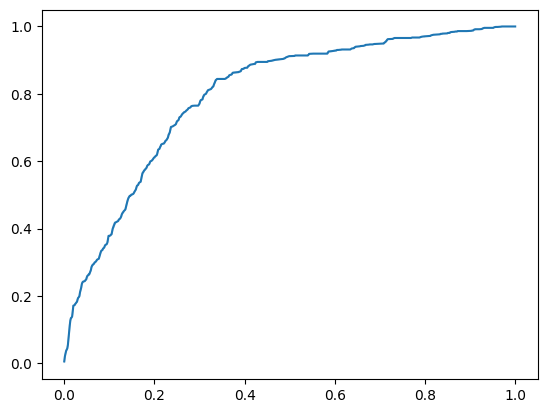

In [24]:
fpr, tpr, thresh = roc_curve(y_test, test_probs_irr)
sns.lineplot(fpr, tpr)

/Users/tzhang04/miniforge3/envs/dsc80/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: >

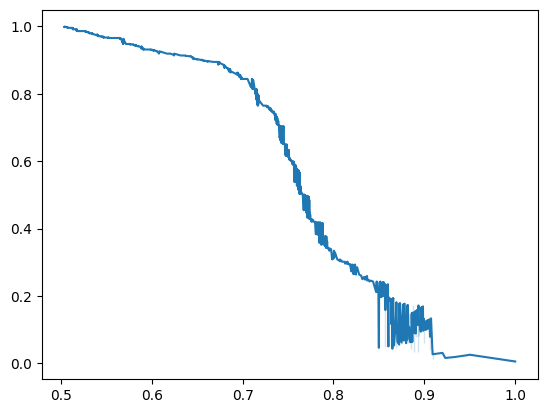

In [25]:
precs, recs, thresh = precision_recall_curve(y_test, test_probs_irr)
sns.lineplot(precs, recs)

In [29]:
X = reg_irreg.iloc[42, :-1].to_numpy().reshape(1, -1)
model.predict(X)

/Users/tzhang04/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])